# Predicting Movie Genres: Data Exploration
In this notebook, through appropriate visuals we analyze the following:
- Movie frequency for each genre
- Relationship between quantitative movie features and movie genres (grouped with above)
- Relationship different qualitative features and genres

And come to conclusion about what features should be considered when building our machine learning model and what features are not worth considering. 



## Make all neccessary imports and setup the environment

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [0]:
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:
data_dir = "drive/My Drive/301 Project/Data/"
image_dir = "drive/My Drive/301 Project/Data/images/"
df_movies = pd.read_csv(data_dir + "cleaned_dataframe.csv").drop(
    columns=["Unnamed: 0"],
    axis=1
)
print("There are {} observations and {} features in this dataset. \n"
      .format(df_movies.shape[0], df_movies.shape[1]))
df_movies.set_index("id", inplace=True)
df_movies.head()
all_genres = df_movies.columns[:20]

There are 7679 observations and 39 features in this dataset. 



## Analysis of relationships between all genres and quantitative features

In [0]:
# Utility function for plotting bar charts
def plot_bar_chart(df, x_col, save=False):
  g = df.nlargest(columns=x_col, n = 20) 
  plt.figure(figsize=(6,9)) 
  ax = sns.barplot(data=g, x=x_col, y="Genre") 
  if save:
    print("Saving...")
    plt.savefig(
        image_dir + "Average_{}_plot.png".format(x_col), 
        bbox_inches = "tight")
  plt.show()

# Utility function for any quantitative feature
def plot_average(feature, save=False):
  avg_ratings = []
  for genre in all_genres:
    avg_ratings.append((df_movies[genre] * df_movies[feature]).sum())
  for i in range(len(all_genres)):
    avg_ratings[i] = avg_ratings[i] / count[i]
  data = {"Genre": all_genres, feature: avg_ratings} 
  all_genres_df = pd.DataFrame(data)
  plot_bar_chart(all_genres_df, x_col=feature, save=save)


#### Bar chart plotting *frequency* of every genre

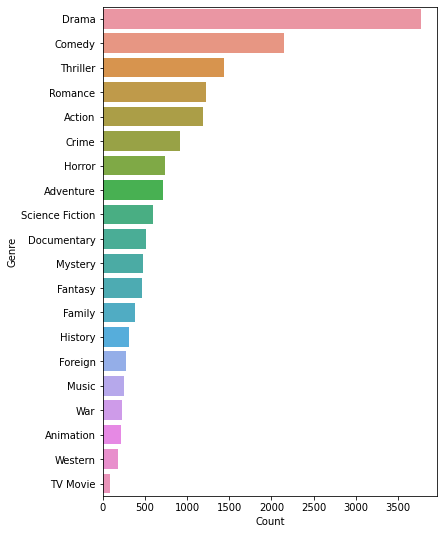

In [0]:
count = []
for genre in all_genres:
  count.append(df_movies[genre].sum())
data = {"Genre": all_genres, "Count": count} 
all_genres_df = pd.DataFrame(data)
plot_bar_chart(all_genres_df, "Count")

It looks like the three most popular genres in this dataset are Drama, Comedy, and Thriller. These tend to be [popular genres](https://www.the-numbers.com/market/genres) although we would expect Action and Adventure to top this list. Based on this ranking of frequency, we expect the predictions to be skewed towards the more frequently occuring genres. 

#### Bar chart plotting *average user rating* of every genre

Saving...


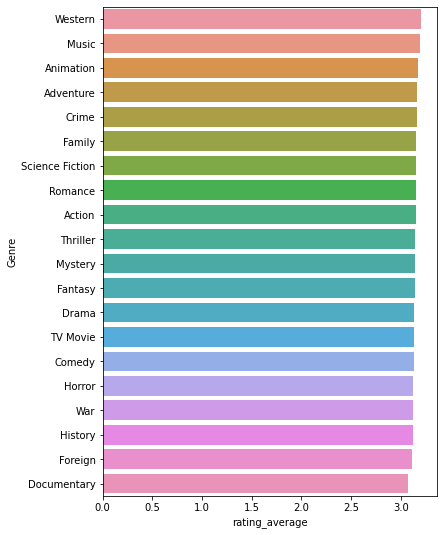

In [0]:
plot_average("rating_average", save=True)

There seems to be no clear winner for best voted movie by users so considering this column will probably not be useful for improving the accuracy of our machine learning model. 

#### Bar chart plotting *average vote* for every genre

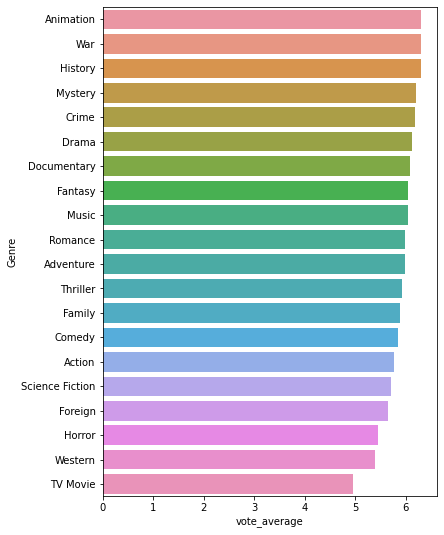

In [0]:
plot_average("vote_average")

This (average vote from [TMDB](https://www.themoviedb.org/?language=en-US)) is a more insightful column than average user rating. Animation, War, and history seem to be best voted while TV movie is the worst. 

#### Bar chart plotting *average vote count* for every genre

Saving...


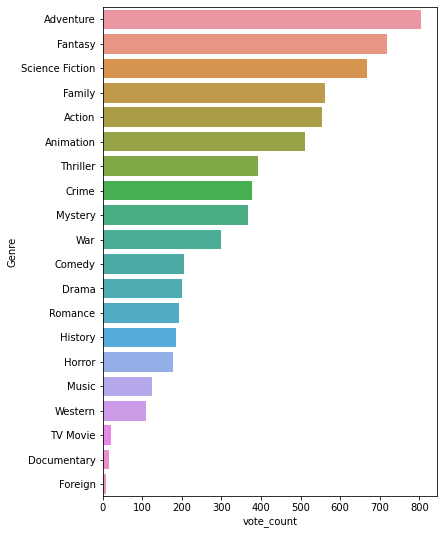

In [0]:
plot_average("vote_count", save=True)

There is a clear distinction between movie genres that recieved most votes on [TMDB](https://www.themoviedb.org/?language=en-US) on average and those that received the least. This should thus be a very useful metric to consider when building our machine learning model. 

#### Bar chart plotting *average popularity* for every genre

Saving...


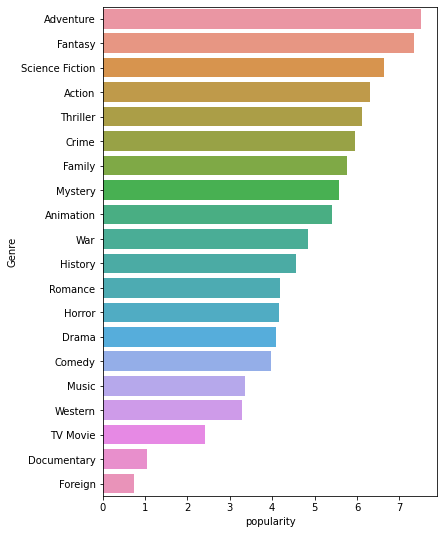

In [0]:
plot_average("popularity", save=True)

#### Bar chart plotting *average revenue* for every genre

Saving...


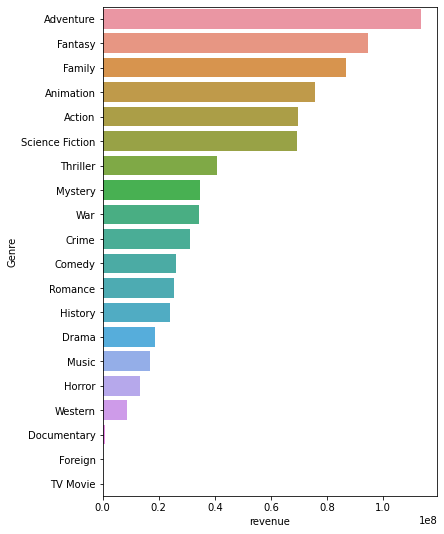

In [0]:
plot_average("revenue", save=True)

#### Bar chart plotting *average budget* for every genre

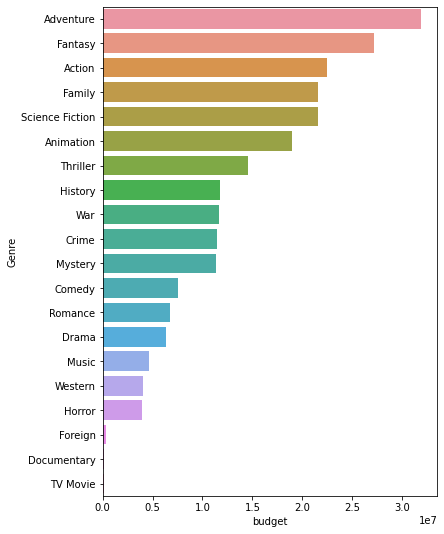

In [0]:
plot_average("budget")

#### Bar chart plotting *average runtime* for every genre

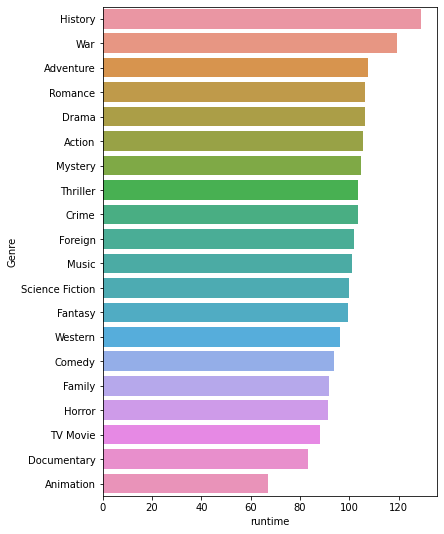

In [0]:
plot_average("runtime")

Similar to average vote count, movies with different genres have significant differences in budget, revenue, runtime, and popularity. Thus, these metrics should be a useful consideration for our machine learning models. 

## Analysis of relationships between all genres and categorical features

In [0]:
def generate_word_cloud(
    genre, 
    feature, 
    stop_words=[], 
    max_words=20, 
    save=False):
  stopwords = set(STOPWORDS)
  stopwords.update(stop_words)
  # Get all text for a movie with a certain genre
  text = df_movies[df_movies[genre] == 1][feature].str.cat()

  # Create and generate a word cloud image
  wordcloud = WordCloud(max_words=max_words, stopwords=stopwords).generate(text)

  # Display the generated image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title("Word Cloud of {}'s {}".format(genre, feature))
  if save:
    print("Saving...")
    plt.savefig(
        image_dir + "{}_{}.png".format(genre, feature),
        bbox_inches = "tight"
        )
  plt.show()

#### Word cloud of *keywords* for each genre

Saving...


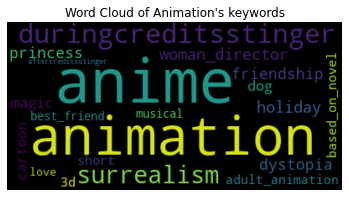

Saving...


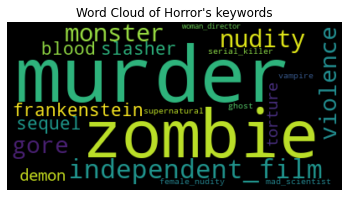

Saving...


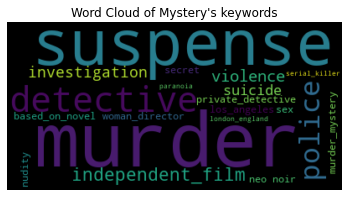

Saving...


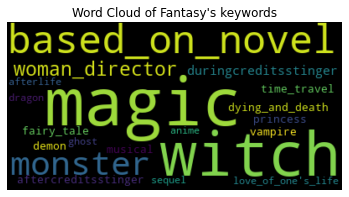

Saving...


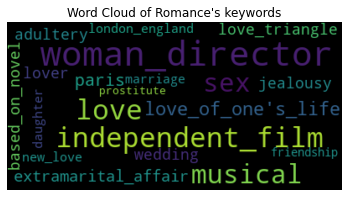

Saving...


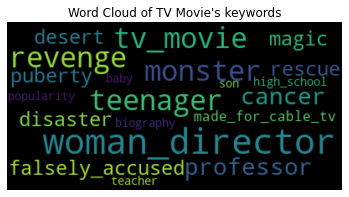

Saving...


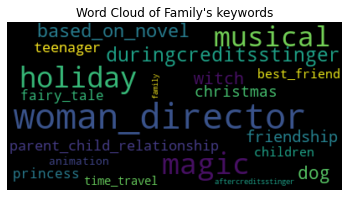

Saving...


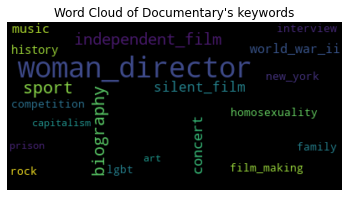

Saving...


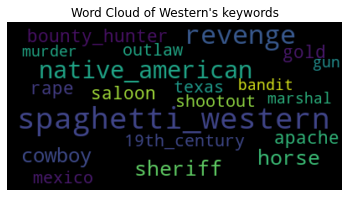

Saving...


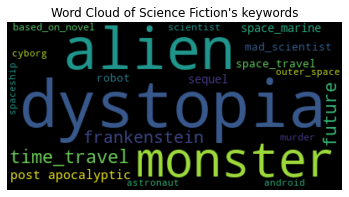

Saving...


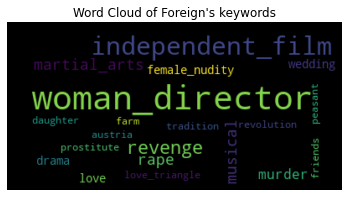

Saving...


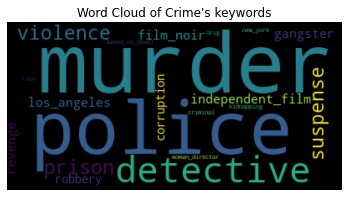

Saving...


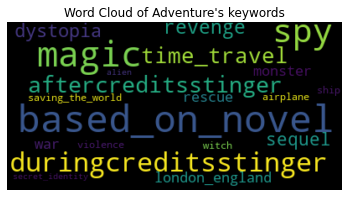

Saving...


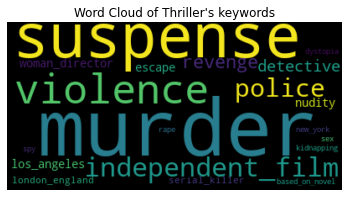

Saving...


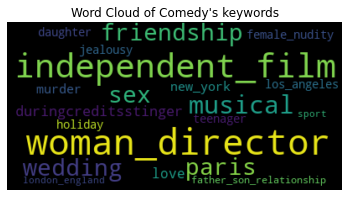

Saving...


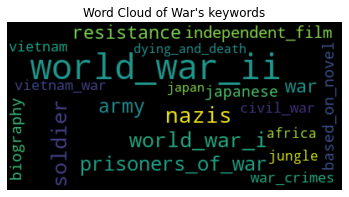

Saving...


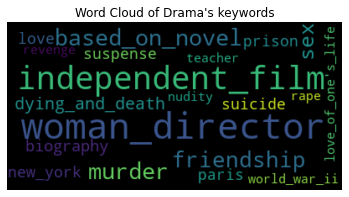

Saving...


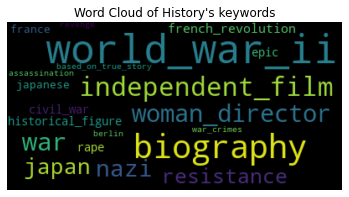

Saving...


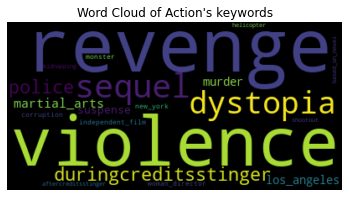

Saving...


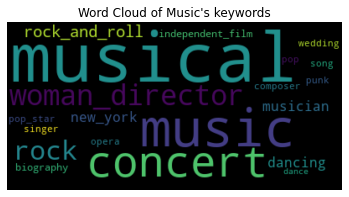

In [0]:
for genre in all_genres:
  generate_word_cloud(genre, "keywords", save=True)

#### Word cloud of *overview* for each genre

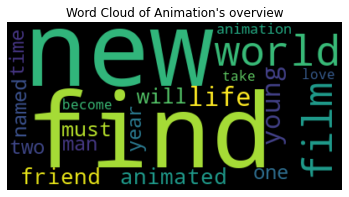

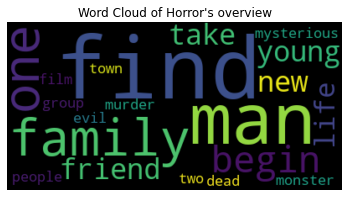

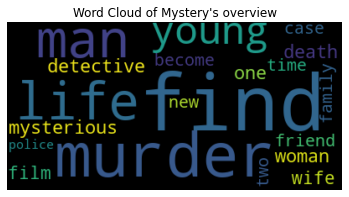

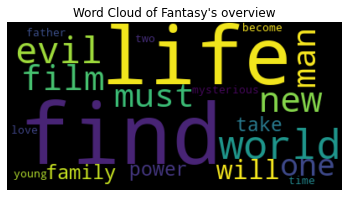

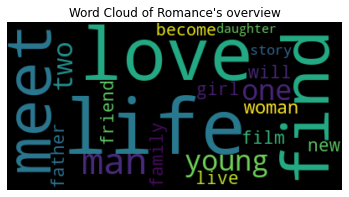

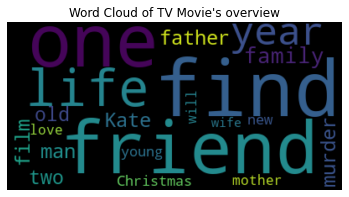

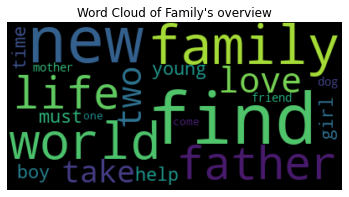

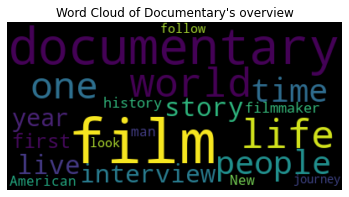

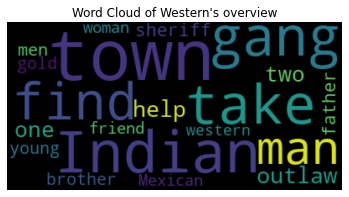

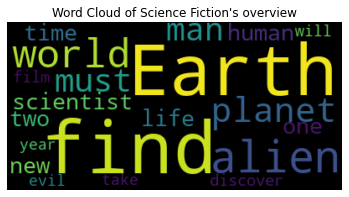

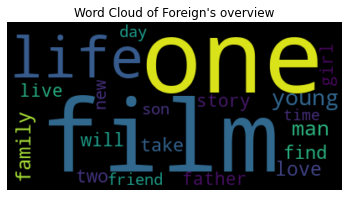

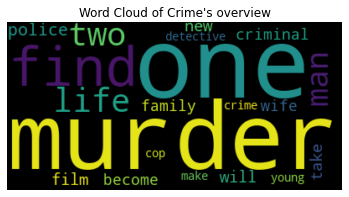

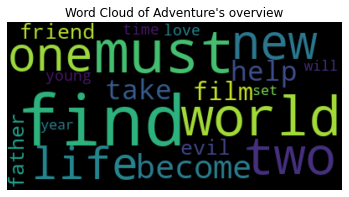

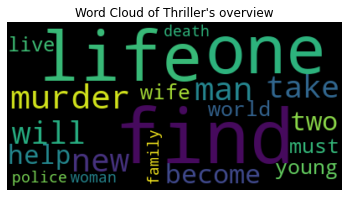

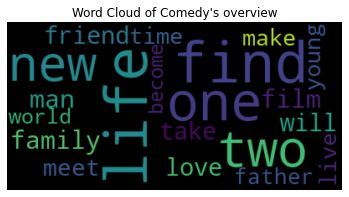

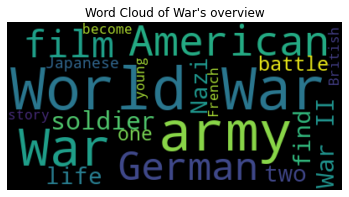

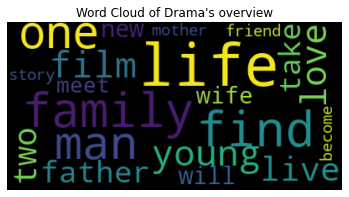

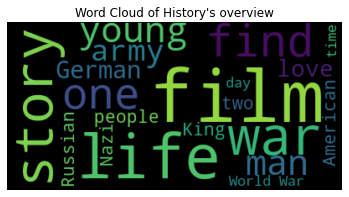

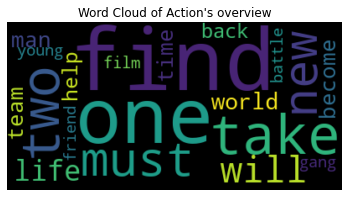

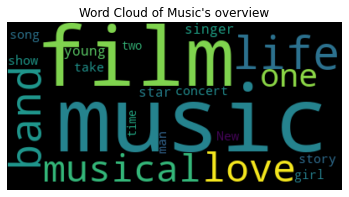

In [0]:
for genre in all_genres:
  generate_word_cloud(genre, "overview")

#### Word cloud of *tagline* for each genre

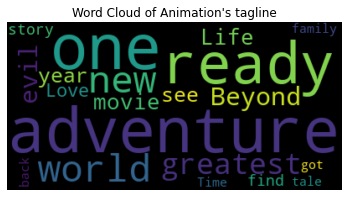

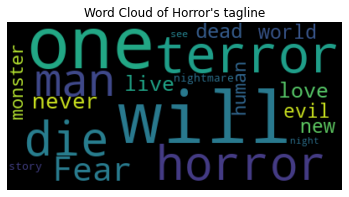

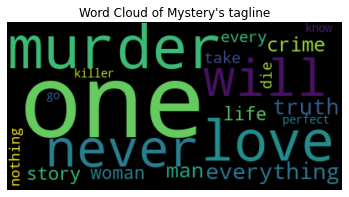

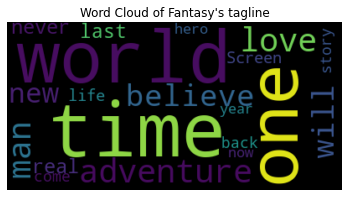

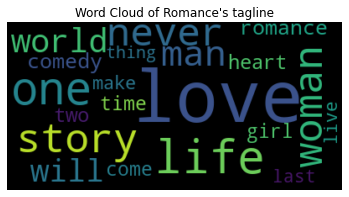

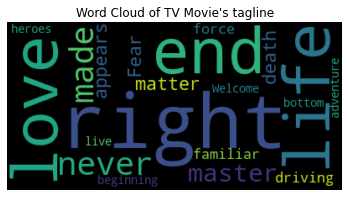

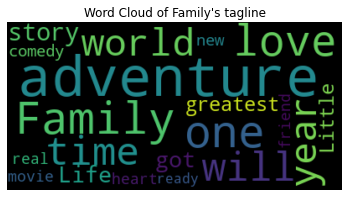

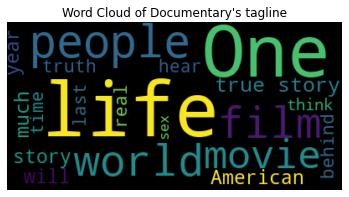

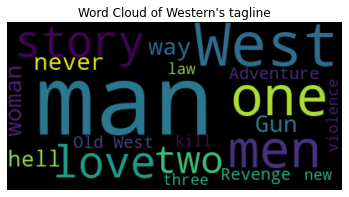

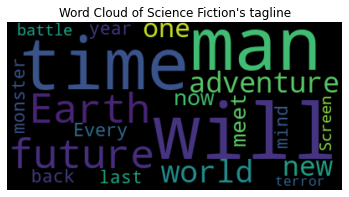

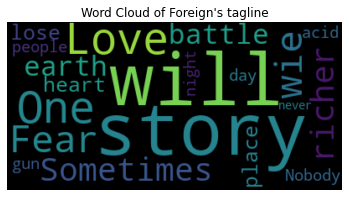

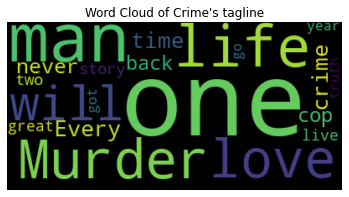

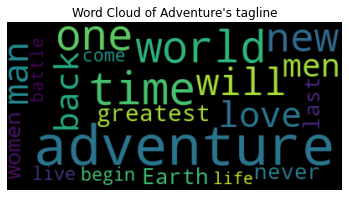

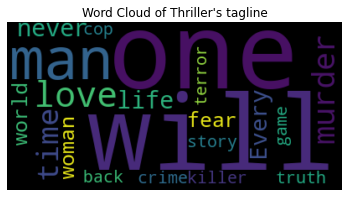

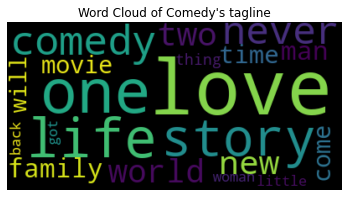

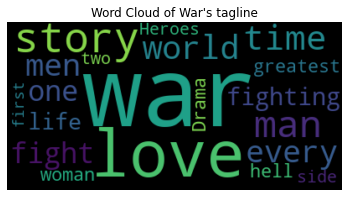

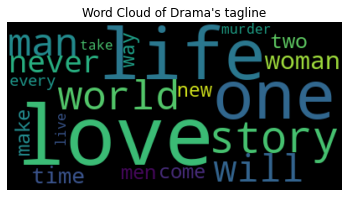

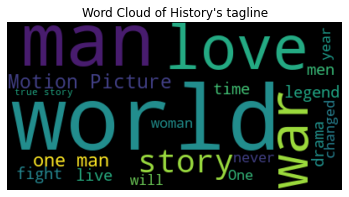

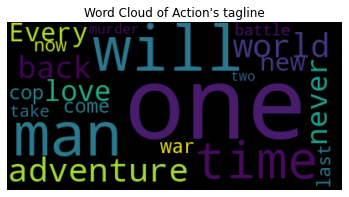

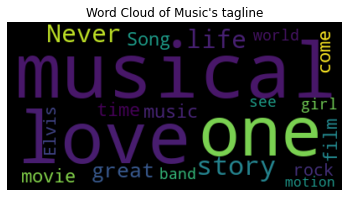

In [0]:
for genre in all_genres:
  generate_word_cloud(genre, "tagline")

After analying the word clouds of all genres for features that describe a movie, using intuition and common knowledge, it seems that the qualitative feature *keywords* aligns best with what words humans would associate with each genre. Additionally, the other two seem to overlap many features. Thus, keywords is definitely a metric we should use in our ML model.  

#### Word cloud of *Cast Members* for each genre

Saving...


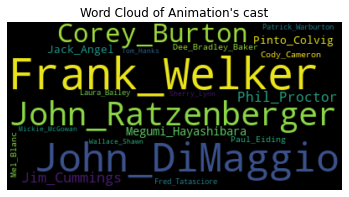

Saving...


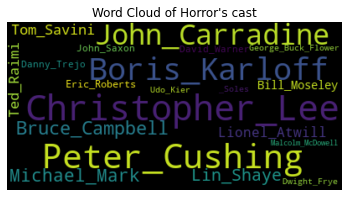

Saving...


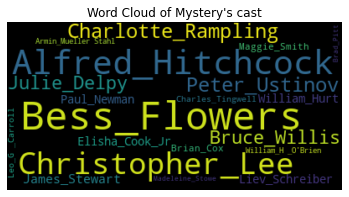

Saving...


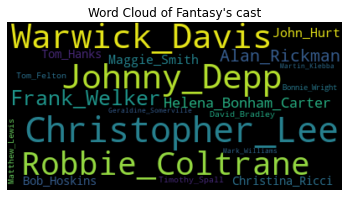

Saving...


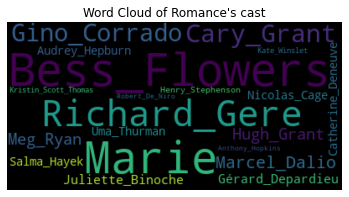

Saving...


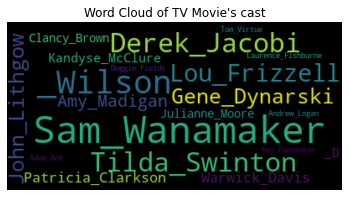

Saving...


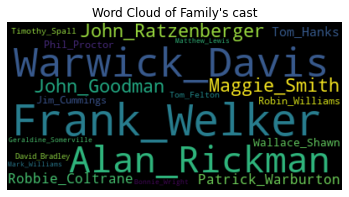

Saving...


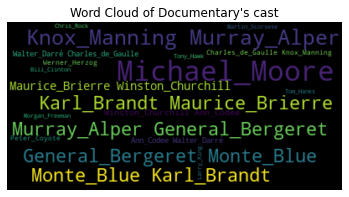

Saving...


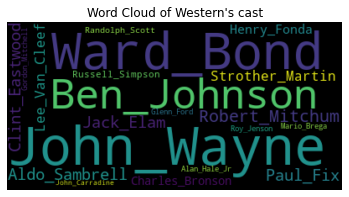

Saving...


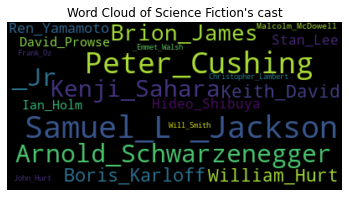

Saving...


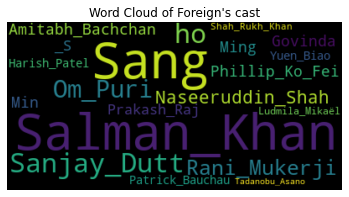

Saving...


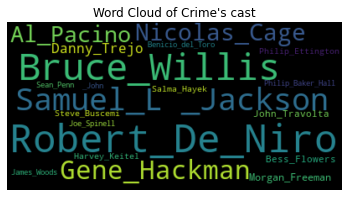

Saving...


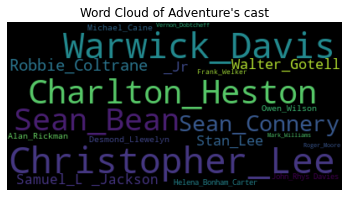

Saving...


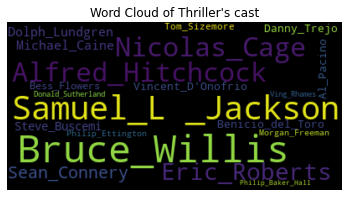

Saving...


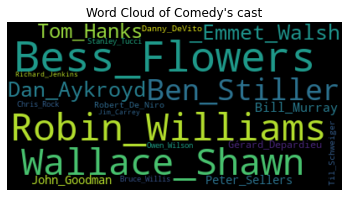

Saving...


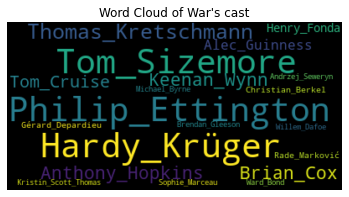

Saving...


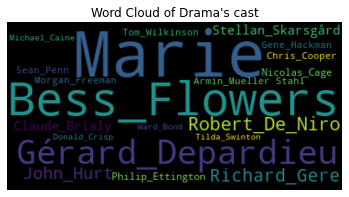

Saving...


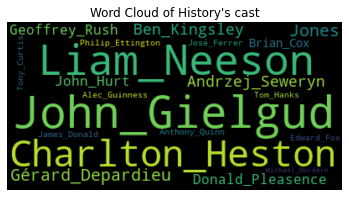

Saving...


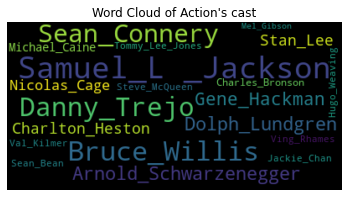

Saving...


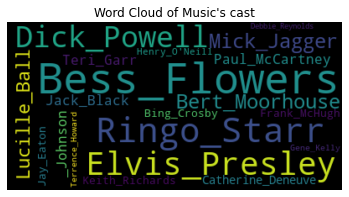

In [0]:
for genre in all_genres:
  generate_word_cloud(genre, "cast", stop_words=["Jean"], save=True)

After googling some of the unfamiliar cast names and looking at the movies they star in, it seems like considering cast would be incredibly effective. In fact, for some of the genres, the cast names are remarkbly accurate such as Music (Elvis Presley, Mick Jagger, etc) and Foreign Films (familiar names of Indian actors). 

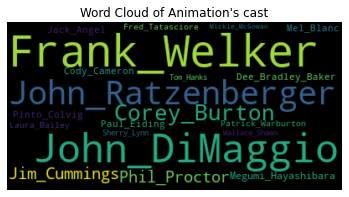

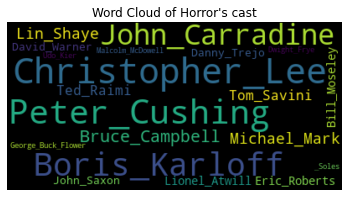

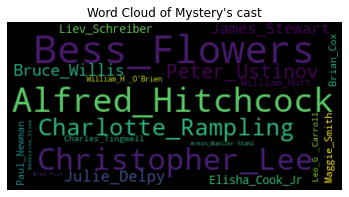

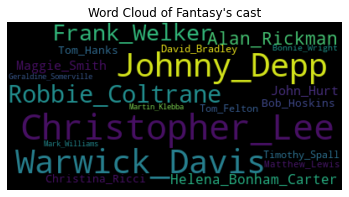

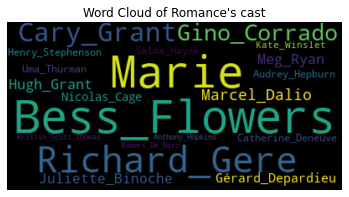

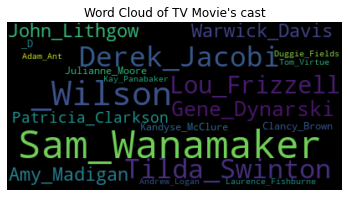

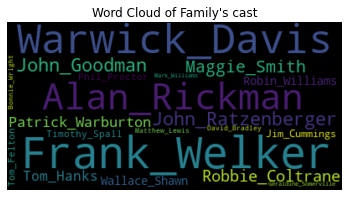

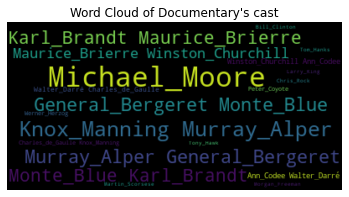

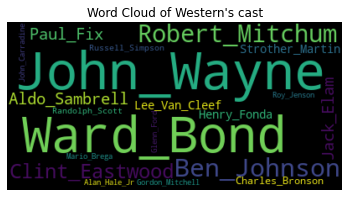

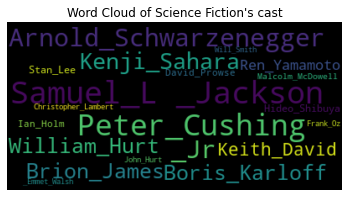

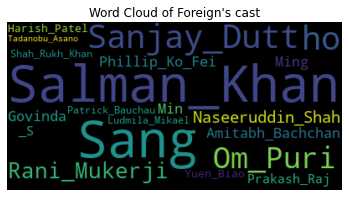

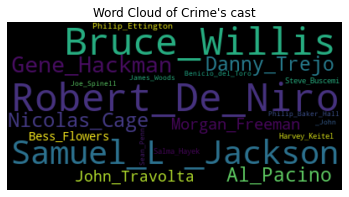

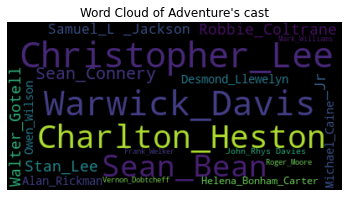

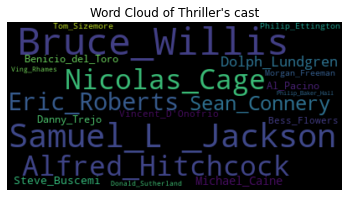

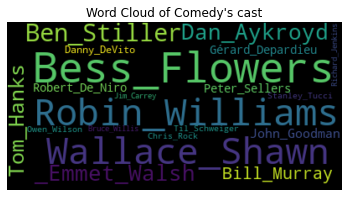

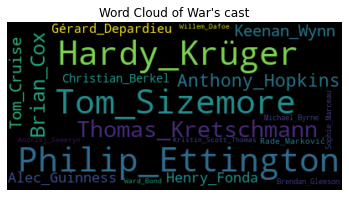

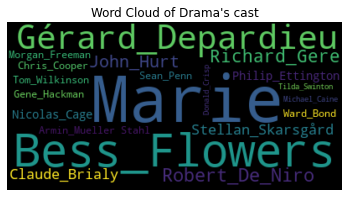

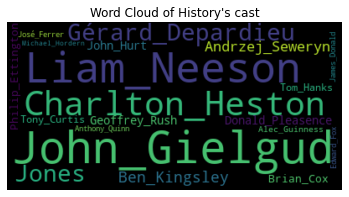

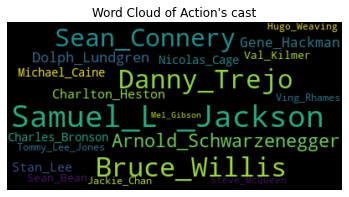

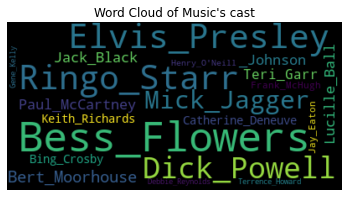

In [0]:
for genre in all_genres:
  generate_word_cloud(genre, "cast", stop_words=["Jean"])

#### Bar plot of rest of the features for 2 genres

In [0]:
def plot_bar_chart_qual(genre, save=False):
  print("FOR GENRE {}:".format(genre.upper()))
  for feature in ["production_companies",	"collection",	"Composer",	"Director",	"Screenplay"]:
    genre_df = df_movies[df_movies[genre] == 1]
    plt.figure(figsize=(15,3))
    sns.barplot(
        x=genre_df[feature].value_counts()[:5].index, 
        y=genre_df[feature].value_counts()[:5],
    )
    if save:
      print("Saving...")
      plt.savefig(
          image_dir + "{}_{}.png".format(genre, feature),
          bbox_inches = "tight"
          )
    plt.show()

FOR GENRE ADVENTURE:
Saving...


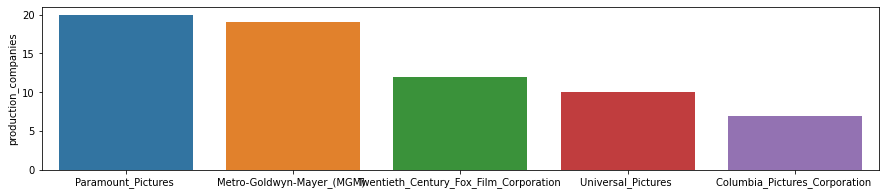

Saving...


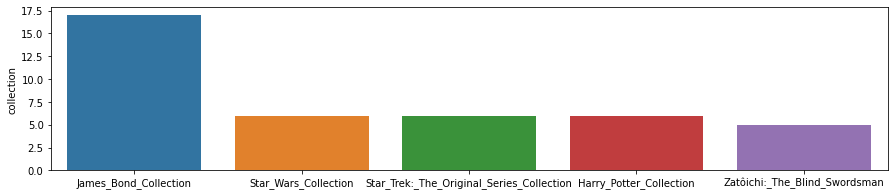

Saving...


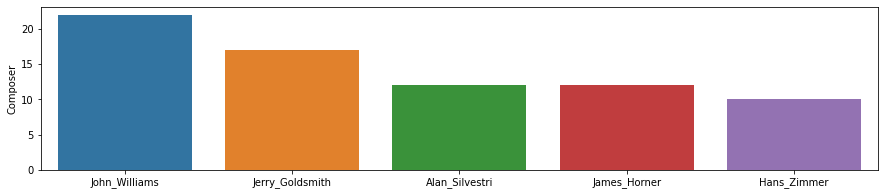

Saving...


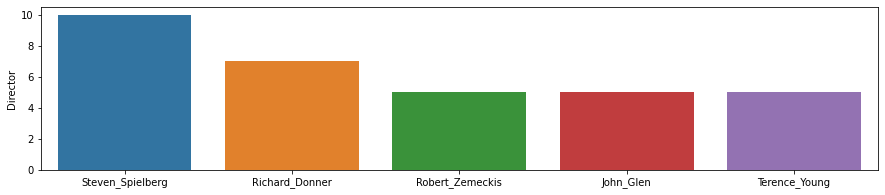

Saving...


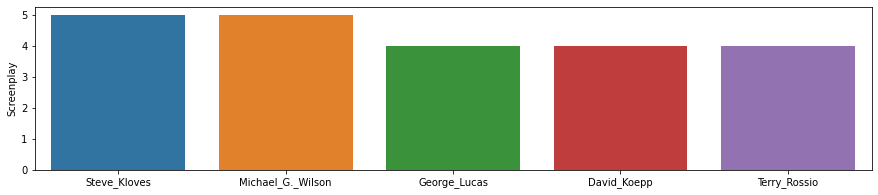

In [0]:
plot_bar_chart_qual("Adventure", save=True)

FOR GENRE COMEDY:


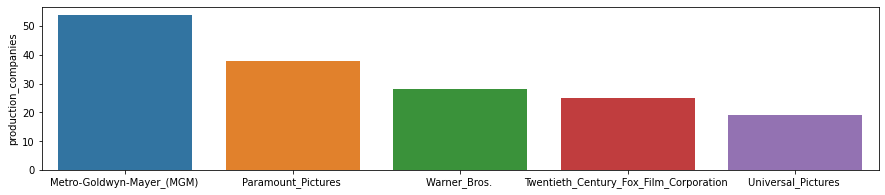

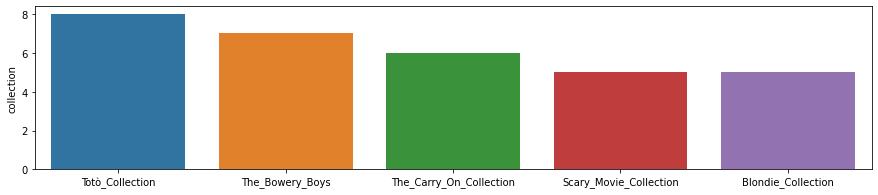

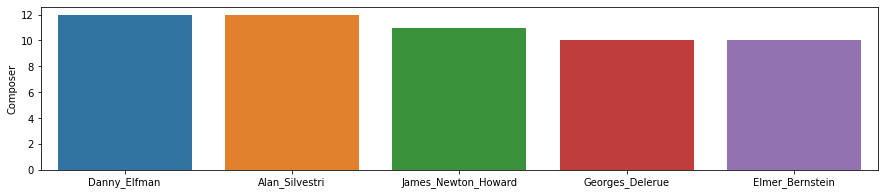

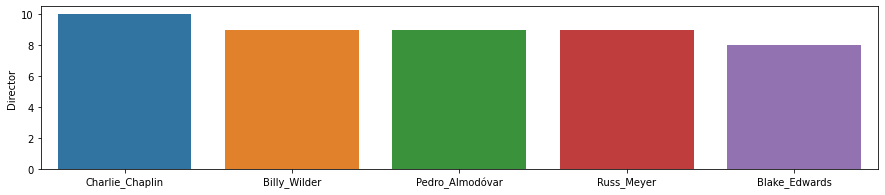

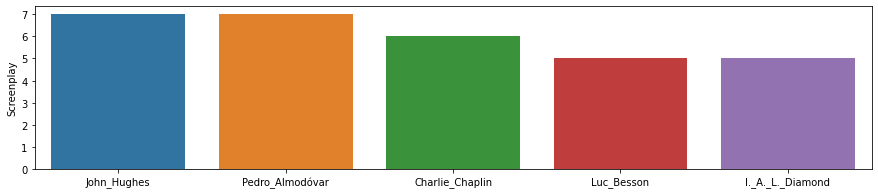

In [0]:
plot_bar_chart_qual("Comedy")

For directors, predicting the genre of their movies can be difficult because they often cover a breadth of genres (such as Steven Speilberg). Same can be said about the production company, screenaply writer and music composer (based on light research). The only definitive feature that will align with genre is the collection as movies in the same collection tend to have the same genres (or at least a significant overlap in genres). 

## Conclusion

In [0]:
print("Features defining a movie in our data set (except genres): \n",
      df_movies.columns[20:])

Features defining a movie in our data set (except genres): 
 Index(['original_title', 'budget', 'overview', 'popularity',
       'production_companies', 'revenue', 'runtime', 'tagline', 'vote_average',
       'vote_count', 'collection', 'Composer', 'Director', 'Screenplay',
       'cast', 'keywords', 'rating_average', 'userId_who_like'],
      dtype='object')


Based on above analysis, following are the groupings of features for predicting the genre of a movie:
- Helpful / Should use: 
  - `budget`: Quant
  - `popularity`: Quant
  - `revenue`: Quant
  - `vote_count`: Quant
  - `collection` Categorical - OHE
  - `cast`: Categorical - TF
  - `keywords`: Categorical - TF
  - `userId_who_like`: Categorical - TF - The intuition behind this one is that users tend to like movies with a similar genre. That is, they have a preference for certain genres. Thus, using users who like a movie and finding genres of other movies they like this would be effective in predicting genres. 
- Maybe helpful / Worth trying:
  - `Director`
  - `Composer`
  - `Screenplay`
  - `production_companies`
  - `tagline`
  - `overview`
- Not helpful / Should not use: 
  - `original_title`: This is just for identification purposes, and movies tend to have distinct names that don't always give away the genre. 
  - `rating_average`
  - `vote_average`
